<a href="https://colab.research.google.com/github/vinits7/ML-Projects/blob/main/ExploratoryDataAnalysis-Sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author : Vinit Shah

Data Science and Business Analytics Intern @ TSF

Task 5 : Exploratory Data Analysis - Sports (Indian Premier League)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

1. Importing the Dataset

In [37]:
#Reading dataset matches
Matches_df = pd.read_csv("/content/matches.csv")
Matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [38]:
#id: The IPL match id
#season: The IPL season
#dl_applied: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.

In [39]:
#Reading deliveries dataset
Deliveries_df = pd.read_csv("/content/deliveries.csv")
Deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


2. Data Preparation and Cleaning

In [40]:
Matches_df.info()
Deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [41]:
Matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [42]:
#The variable 'umpire3' is dropped because it contains too many missing data.
Matches_df.drop('umpire3',axis = 1, inplace=True)

In [43]:
Deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [44]:
#player_dismissed,dismissal_kind,fielder have lot of missing values
#It is normal for these features to contain missing data as dismissal of player does not happen in every ball or over.

In [45]:
Matches_df["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [46]:
Matches_df["team2"].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [47]:
Deliveries_df["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [48]:
Deliveries_df["bowling_team"].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [49]:
#'Rising Pune Supergiant' & 'Rising Pune Supergiants' are same
Matches_df.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)
Deliveries_df.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)

In [50]:
Matches_df["city"].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [51]:
#'Bangalore' & 'Bengaluru' are same
Matches_df.replace('Bangalore','Bengaluru', inplace=True)

3. Exploratory Analysis and Visualization

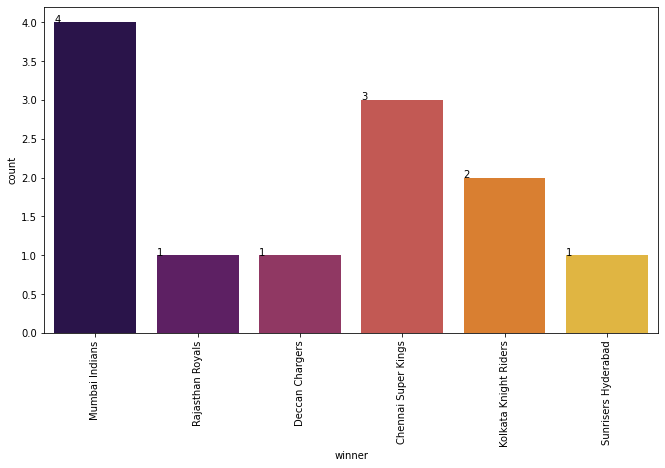

In [52]:
#Number of wins per team: "Mumbai Indians is the most successful team with highest wins in 4 seasons 
#followed by Chennai Super Kings with 3 seasons"
plt.subplots(figsize=(11,6))
season_winner = Matches_df.drop_duplicates('season', keep='last')
ax=sns.countplot(x='winner', data=season_winner, palette = 'inferno')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

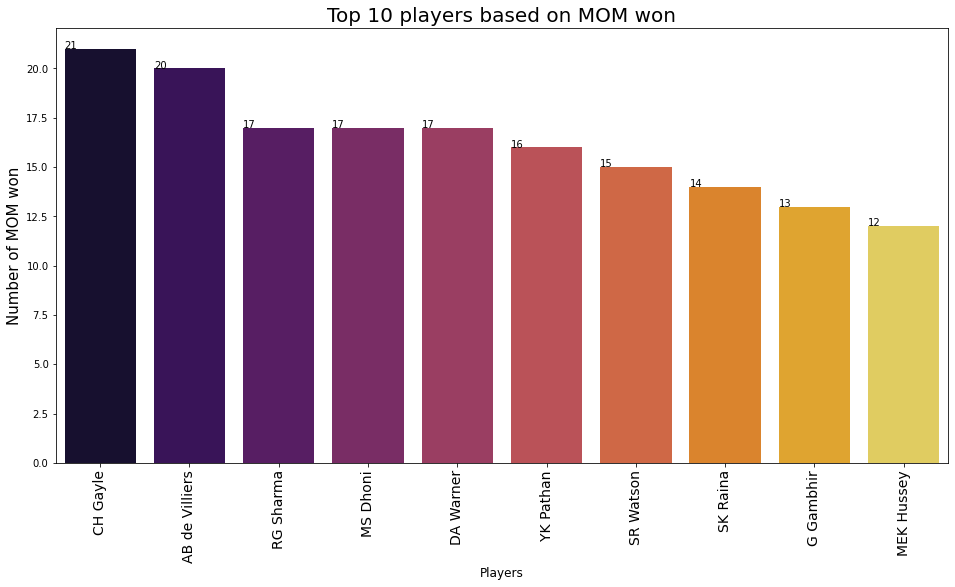

In [53]:
#Top 10 Players based on MOM:CH Gayle is the player with the most man of the match award with 21 
#followed by AB de Villiers with 20
plt.subplots(figsize=(16,8))
ax = sns.barplot(x = Matches_df['player_of_match'].value_counts()[:10].index, y = Matches_df['player_of_match'].value_counts()[:10],palette = 'inferno')
plt.ylabel('Number of MOM won',fontsize=15)
plt.title('Top 10 players based on MOM won',fontsize=20)
plt.xlabel('Players',fontsize=12)
plt.xticks(rotation=90,fontsize=14)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=0).astype(np.int64), (p.get_x(), p.get_height()))
plt.show()

In [54]:
#factors contributing win or loss of a team.

In [55]:
len(Matches_df)

756

In [56]:
defending = Matches_df['win_by_runs'].value_counts()
defending.sort_values(ascending=False)

0      419
14      13
4       11
10      11
1       10
      ... 
62       1
87       1
60       1
130      1
118      1
Name: win_by_runs, Length: 89, dtype: int64

In [57]:
chasing = Matches_df['win_by_wickets'].value_counts()
chasing.sort_values(ascending=False)

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

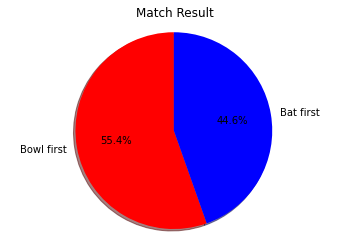

In [58]:
#There were more matches won by chasing the total(419 matches) i.e. 55% than defending(350 matches) i.e.45%.
Matches_df['win_by']=np.where(Matches_df['win_by_runs']>0,'Bat first','Bowl first')
match=Matches_df.win_by.value_counts()
labels=np.array(match.index)
sizes = match.values
colors = ['red', 'blue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Match Result')
plt.axis('equal')
plt.show()

In [59]:
#Toss Decision:

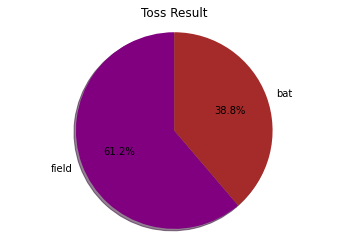

In [60]:
# 61% of toss decision is fielding and 39% is batting.
toss=Matches_df.toss_decision.value_counts()
labels=np.array(toss.index)
sizes = toss.values
colors = ['purple', 'brown']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)

plt.title('Toss Result')
plt.axis('equal')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


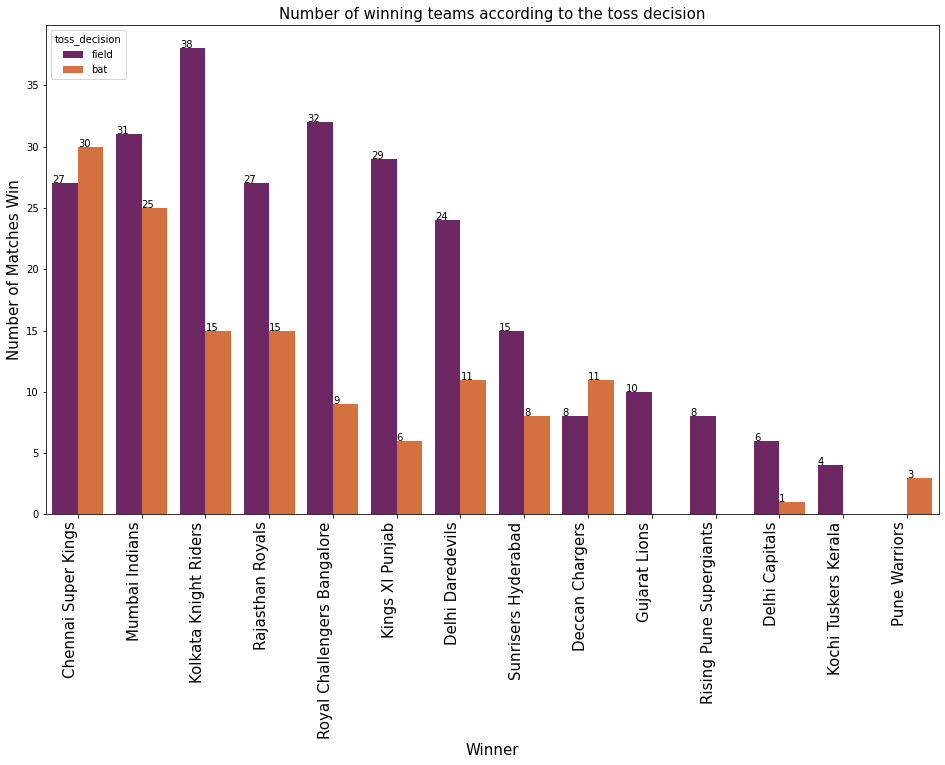

In [61]:
#number of matches win is higher when toss_decision is 'field'.
plt.subplots(figsize=(16,9))
toss=Matches_df[Matches_df['toss_winner']==Matches_df['winner']]
ax = sns.countplot("winner", data = toss, hue = 'toss_decision',order = toss['toss_winner'].value_counts().index,palette='inferno')
plt.title("Number of winning teams according to the toss decision",fontsize=15)
plt.xticks(rotation='vertical', ha = 'right',fontsize=15)
plt.ylabel('Number of Matches Win',fontsize=15)
plt.xlabel('Winner',fontsize=15)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=0).astype(np.int64), (p.get_x(), p.get_height()))
plt.show()

In [62]:
# To analyse if toss winners are match winners in most seasons.
#In the final matches in each seasons, most of the toss winners are match winners

final_matches=Matches_df.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner', 'toss_winner']].reset_index(drop=True).sort_values('season')

,season,winner,toss_winner
1,2008,Rajasthan Royals,Rajasthan Royals
2,2009,Deccan Chargers,Royal Challengers Bangalore
3,2010,Chennai Super Kings,Chennai Super Kings
4,2011,Chennai Super Kings,Chennai Super Kings
5,2012,Kolkata Knight Riders,Chennai Super Kings
6,2013,Mumbai Indians,Mumbai Indians
7,2014,Kolkata Knight Riders,Kolkata Knight Riders
8,2015,Mumbai Indians,Chennai Super Kings
9,2016,Sunrisers Hyderabad,Sunrisers Hyderabad
0,2017,Mumbai Indians,Mumbai Indians


In [63]:
#Suggest teams or players a company should endorse for its products.

In [64]:
#Batsman analysis:

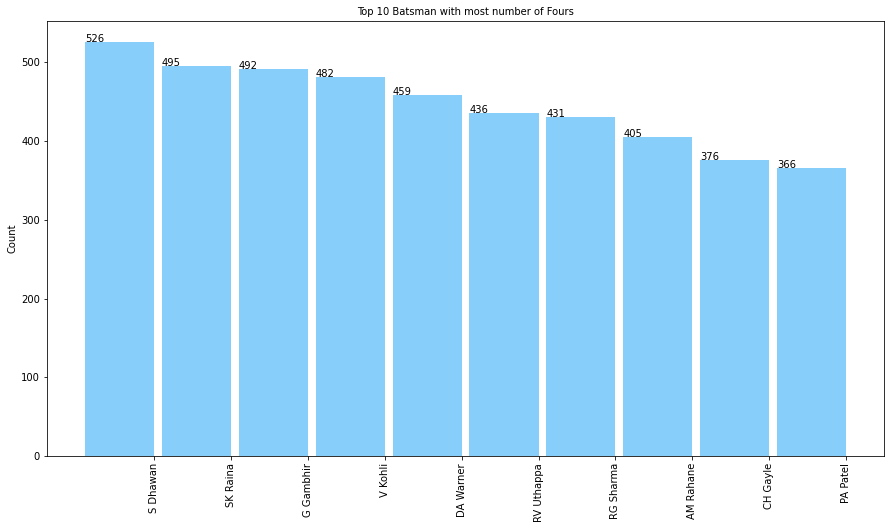

In [65]:
#Top 10 Batsman with most number of Fours
#Shekhar Dhawan has scored highest fours followed by SK Raina

batsman_df = Deliveries_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman_df = batsman_df.iloc[:10,:]

labels = np.array(batsman_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(batsman_df['batsman_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top 10 Batsman with most number of Fours",fontsize = 10)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=0).astype(np.int64), (p.get_x(), p.get_height()))
plt.show()

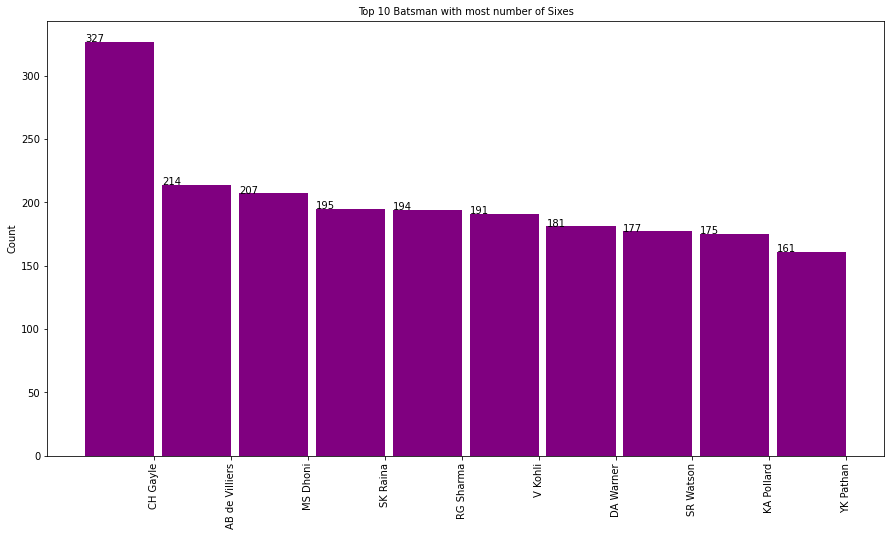

In [66]:
#Top 10 Batsman with most number of Fours
##CH Gayle has scored highest sixes followed by AB de Villiers

batsman_df = Deliveries_df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman_df = batsman_df.iloc[:10,:]

labels = np.array(batsman_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(batsman_df['batsman_runs']), width=width, color='purple')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top 10 Batsman with most number of Sixes",fontsize = 10)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=0).astype(np.int64), (p.get_x(), p.get_height()))
plt.show()

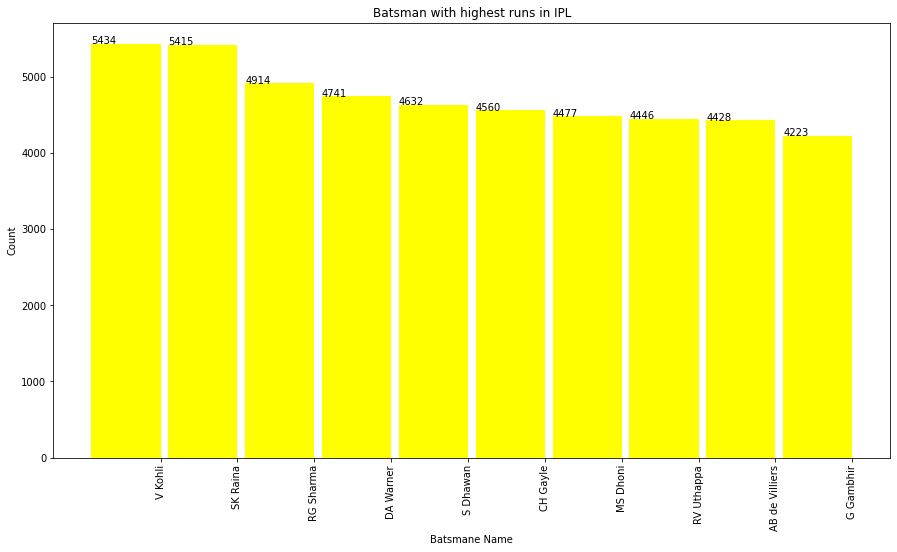

In [67]:
#Batsman with highest runs in IPL
# Virat Kohli is the highest run scorer followed by SK Raina

batsman_df = Deliveries_df.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
batsman_df = batsman_df.iloc[:10,:]

labels = np.array(batsman_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(batsman_df['batsman_runs']), width=width, color='yellow')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Batsman with highest runs in IPL")
ax.set_xlabel('Batsmane Name')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(), decimals=0).astype(np.int64), (p.get_x(), p.get_height()))
plt.show()

In [68]:
#Bowler Analysis

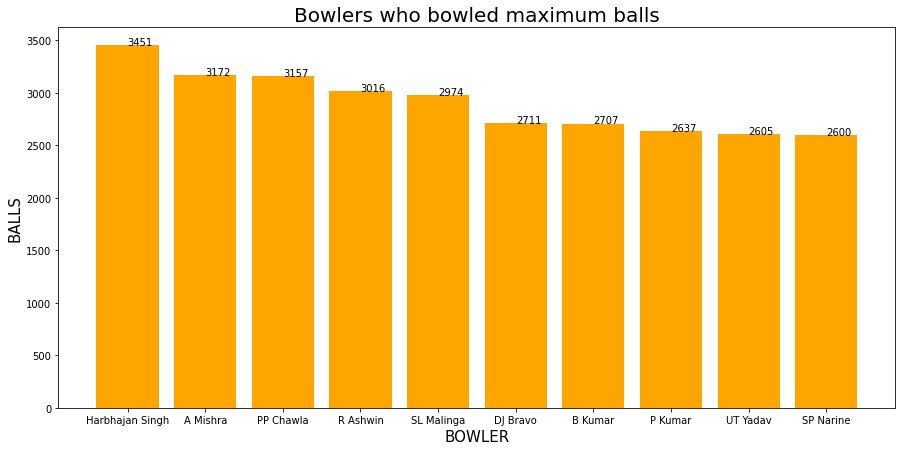

In [69]:
#Top 10 bowlers in IPL who bowled maximum balls
#Harbhajan Singh is the bowler with highest balls followed by A Misra

df = pd.merge(Matches_df, Deliveries_df, left_on='id', right_on='match_id')
bowler = df['bowler'].value_counts()[:10]

plt.figure(figsize=(15,7))
plt.bar(x=bowler.index, height=bowler.values,color='orange')

plt.title('Bowlers who bowled maximum balls', fontsize=20)
plt.xlabel('BOWLER',fontsize=15)
plt.ylabel('BALLS',fontsize=15)

for i,v in enumerate(bowler.values):
    plt.text(x=i, y=v+1, s=v)
    
plt.show()

The Top Wicket Takers in the Tournament are:
               bowler  Wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147
46           B Kumar      133
232         R Ashwin      125
296        SP Narine      122
326         UT Yadav      119
244        RA Jadeja      108


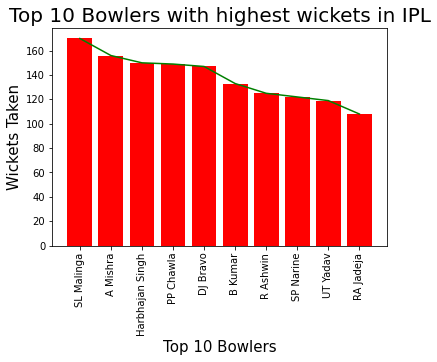

In [70]:
#Top 10 bowlers in IPL with highest wicket.
# SL Malinga is the bowler with highest wicket of 170 followed by A Mishra with 156 wickets

bowling_wickets= Deliveries_df[Deliveries_df['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
print('The Top Wicket Takers in the Tournament are:\n',top_bowlers)
plt.bar(top_bowlers['bowler'],top_bowlers['Wickets'],color='r')
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets'],color='g')
plt.xticks(rotation=90)
plt.xlabel('Top 10 Bowlers',size=15)
plt.ylabel('Wickets Taken',size=15)
plt.title('Top 10 Bowlers with highest wickets in IPL',size=20)
plt.show()

In [71]:
#CONCLUSION::

# MOST SUCCESSFUL TEAMS:
#Mumbai Indians is the most successful team with highest wins in 4 seasons followed by Chennai Super Kings in 3 seasons

# MOST SUCCESSFUL PLAYERS:
#CH Gayle is the player with the most man of the match award with 21 followed by AB de Villiers with 20.

# FACTORS CONTRIBUTING WIN OR LOSS OF A TEAM.
#There were more matches won by chasing the total (419 matches, 55%) than defending (350 matches, 45%).
#The number of wins is higher when toss_decision is 'field'.
#Toss winners are match winners in most IPL season's final matches.

#SUGGEST TEAMS OR PLAYERS A COMPANY SHOULD ENDORSE FOR ITS PRODUCTS.
#The teams that can be recommended for companies to endorse are: Mumbai Indians, Chennai Super Kings and Kolkata Knight Riders.
#The recommended bowler for companies to endorse could be: SL Malinga, Harbajan Singh and A.Mishra.
#The recommended batman for companies to endorse could be: CH Gayle, AB de Villiers, V Kohli, S Dhawan and SK Raina.